Must force downgrade dask to older version (`!pip install dask==2024.12`) becuase dask removed `dask.dataframe.core.DataFrame` in its 2025.01 release.

In [26]:
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade
!pip install dask==2024.12

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-207g4ju4
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-207g4ju4
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


#**Preparing data**

,Date,Total
0,7/8/2021,3773
1,7/9/2021,3172
2,7/10/2021,2079
3,7/11/2021,2725
4,7/12/2021,4542


<Axes: >

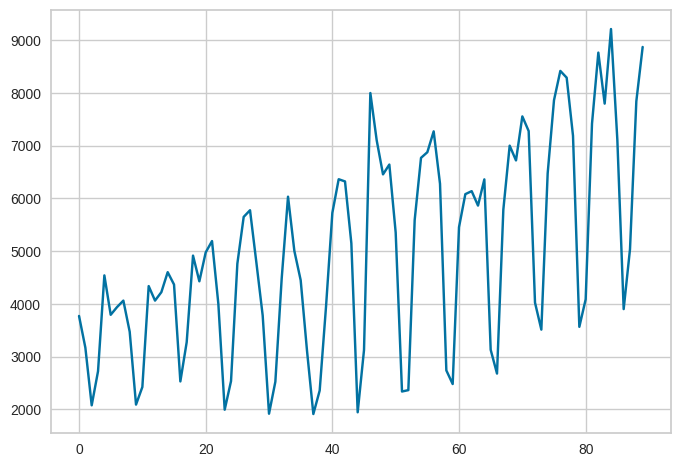

In [27]:
from pycaret.datasets import get_data
data = get_data('pycaret_downloads')
data['Total'].plot()


In [28]:
import pandas as pd
# 'Date' column was originally of type "Object", convert it to "Datetime"
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

,0
Date,datetime64[ns]
Total,int64


<Axes: xlabel='Date'>

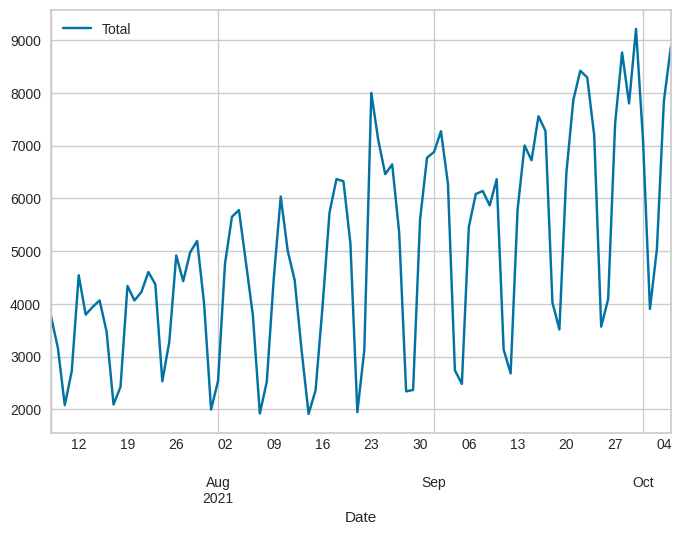

In [29]:
# Set index on the datetime column when dealing with timeseries
data.set_index('Date', drop=True, inplace=True)
# Verify that 'Date' is the index and can be displayed as datetime on a plot
data.plot()

In [30]:
data.tail()

,Total
Date,
2021-10-01,7115
2021-10-02,3903
2021-10-03,5038
2021-10-04,7843
2021-10-05,8872


In [31]:
# original data runs from 2021-07-08 to 2021-10-05, split into train&test set
cutoff_date = "2021-09-15"
train = data[:cutoff_date]
test = data[cutoff_date:]
# train.head()
test.head()

,Total
Date,
2021-09-15,6721
2021-09-16,7556
2021-09-17,7278
2021-09-18,4026
2021-09-19,3514


#**Model training**

In [32]:
# Set up timeseries model
from pycaret.time_series import *
exp = setup(data = data, target = 'Total',fold = 3, fh = 12, session_id = 123) # Forecasting Horizon, fh = 12 means predict 12 data points (in this case, 12 days)

,Description,Value
0,session_id,123
1,Target,Total
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(90, 1)"
5,Transformed data shape,"(90, 1)"
6,Transformed train set shape,"(78, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [33]:
exp.plot_model(plot="train_test_split")

In [25]:
top4 = exp.compare_models(n_select = 4)


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
theta,Theta Forecaster,1.2796,1.1407,735.9092,897.9202,0.1556,0.1523,0.7303,0.0567
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.3460,1.2833,737.3306,934.8335,0.1430,0.1419,0.7346,0.5067
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.3716,1.3094,740.7690,924.8984,0.1327,0.1402,0.7345,0.4267
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9459,964.8748,0.1413,0.1466,0.7146,0.3867
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9461,964.8752,0.1413,0.1466,0.7146,0.3833
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9457,964.8746,0.1413,0.1466,0.7146,0.3933
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9457,964.8746,0.1413,0.1466,0.7146,0.4200
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9461,964.8752,0.1413,0.1466,0.7146,0.8967
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.4680,1.3076,795.8164,936.3670,0.1531,0.1538,0.7309,0.7267
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.4741,1.3402,804.2119,968.4707,0.1520,0.1547,0.7141,0.3867


Processing:   0%|          | 0/120 [00:00<?, ?it/s]

In [34]:
plot_model(top4, plot = 'forecast')

In [35]:
best = exp.compare_models(sort='mae')


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
theta,Theta Forecaster,1.2796,1.1407,735.9092,897.9202,0.1556,0.1523,0.7303,0.0567
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.3460,1.2833,737.3306,934.8335,0.1430,0.1419,0.7346,0.5100
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.3716,1.3094,740.7690,924.8984,0.1327,0.1402,0.7345,0.4700
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9457,964.8746,0.1413,0.1466,0.7146,0.3800
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9457,964.8746,0.1413,0.1466,0.7146,0.3933
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9459,964.8748,0.1413,0.1466,0.7146,0.3833
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9461,964.8752,0.1413,0.1466,0.7146,0.3967
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9461,964.8752,0.1413,0.1466,0.7146,0.3767
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.4680,1.3076,795.8164,936.3670,0.1531,0.1538,0.7309,0.5367
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.4741,1.3402,804.2119,968.4707,0.1520,0.1547,0.7141,0.6033


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [36]:
plot_model(best, plot = 'forecast')

In [37]:
blender = exp.blend_models(top4)


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-08-18,1.7599,1.9467,805.3295,1082.6487,0.1529,0.1608,0.7027
1,2021-08-30,0.8784,0.7622,566.9499,738.0655,0.1118,0.1099,0.7903
2,2021-09-11,1.0531,0.8311,653.3137,757.0344,0.1158,0.1156,0.8298
Mean,NaT,1.2305,1.1800,675.1977,859.2495,0.1269,0.1288,0.7743
SD,NaT,0.3811,0.5429,98.5407,158.1568,0.0185,0.0228,0.0531


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [38]:
# Create an ensemble using the top 4 models
final_model = exp.finalize_model(blender)
pred_holdout = exp.predict_model(final_model)

In [39]:
plot_model(final_model, plot = 'forecast')

In [40]:
# Plot prediction for the next 24 data points
plot_model(final_model, plot = 'forecast', data_kwargs={'fh': 24})

In [41]:
save_model(best, 'best_ThetaForecaster')
save_model(final_model, 'top4_ensemble')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 EnsembleForecaster(forecasters=[('Theta '
                                                                                                                                                                  'Forecaster',
                                                                                                                                                                  ThetaForecaster(sp=7)),
                                                                                                         